In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

import windIO
import wind
import windCAD
import foam

## Basic definitions

### Files and directories

In [2]:
dir_wtVl_nbE2 = "" #r"D:/tempData_depot/simData_CandC/wt_tngE2/"
dir_wtVl_nbE3 = "" #r"D:/tempData_depot/simData_CandC/wt_tngE3/"
dir_wtCp_tngE2 = r""
dir_wtCp_tngE3 = r""
tapFile = r"D:\OneDrive - The University of Western Ontario\Documents\Projects\NRC_fieldMonitoring\NRC_gable27deg\Drawings/nrcNBwtTapDefinition.csv"
figDir = r"D:/OneDrive - The University of Western Ontario/Documents/Projects/NRC_fieldMonitoring/NRC_gable27deg/Data/windTunnel/__plots/"

### General parameters

In [3]:
saveFigs = False

## Building Geometry

### Basic geometry

In [4]:
H = 80  # average roof height
Hr = 97.5  # ridge height
He = 62.5  # eaves height
Havg = np.mean([Hr, He])
B = 410
D = 138.7
alpha = 26.1  # roof slope

lScl=0.01

badTaps = None


### Basics of faces

In [5]:

tapData = pd.read_csv(tapFile, na_filter=False)

faceID = [1,2,3,4,5,6]
name = ['West_roof','East_roof','East_wall','North_wall','West_wall','South_wall']
note = ['','','','','','']
origin = [[0, -71.6, 62.5], [0, 71.6, 62.5], [0, 69.35, 0], [-205, 0, 0], [0, -69.35, 0], [205, 0, 0], ]

basisVectors = [
            [[1, 0, 0], [0, 0.898027575760616, 0.439939169855915], [0, -0.439939169855915, 0.898027575760616]], 
            [[-1, 0, 0], [0, -0.898027575760616, 0.439939169855915], [0, 0.439939169855915, 0.898027575760616]], 
            [[-1, 0, 0], [0, 0, 1], [0, 1, 0]], 
            [[0, -1, 0], [0, 0, 1], [-1, 0, 0]], 
            [[1, 0, 0], [0, 0, 1], [0, -1, 0]], 
            [[0, 1, 0], [0, 0, 1], [1, 0, 0]], 
            ]

# origin_plt = [[0, 79.6967], [0, -79.6967], [0, -223.5182], [-357.0189, 0], [0, -223.5182], [357.0189, 0], ]
origin_plt = [[0, -79.6967], [0, -79.6967], [0, -150], [0, -320], [0, -150], [0, -320], ]

basisVectors_plt = [
            [[1, 0], [0, 1]],       # Face 1 (West_roof)
            [[-1, 0], [0, -1]],     # Face 2 (East_roof)
            [[-1, 0], [0, -1]],     # Face 3 (East_wall)
            [[0, 1], [-1, 0]],      # Face 4 (North_wall)
            [[1, 0], [0, 1]],       # Face 5 (West_wall)
            [[0, -1], [1, 0]],      # Face 6 (South_wall)
            ]

vertices_basic = [
            [[-207.25, 0], [-207.25, 79.6967], [207.25, 79.6967], [207.25, 0], [-207.25, 0], ],  # Face 1
            [[-207.25, 0], [-207.25, 79.6967], [207.25, 79.6967], [207.25, 0], [-207.25, 0], ],  # Face 2
            [[-205, 0], [-205, 60.76], [205, 60.76], [205, 0], [-205, 0], ],  # Face 3
            [[-69.35, 0], [-69.35, 61.8599], [0, 95.76], [69.35, 61.8599], [69.35, 0], [-69.35, 0], ],  # Face 4
            [[-205, 0], [-205, 60.76], [205, 60.76], [205, 0], [-205, 0], ],  # Face 5
            [[-69.35, 0], [-69.35, 61.8599], [0, 95.76], [69.35, 61.8599], [69.35, 0], [-69.35, 0], ],  # Face 6
            ]

vertices_full = [
            [[-207.25, 0], [-207.25, 79.6967], [207.25, 79.6967], [207.25, 0], [-207.25, 0], ],  # Face 1
            [[-207.25, 0], [-207.25, 79.6967], [207.25, 79.6967], [207.25, 0], [72.4, 0], [51.85, 24.6713], [31.3, 0], [-55.6, 0], [-83.05, 24.6713], [-110.5, 0], [-207.25, 0], ],  # Face 2
            [[-205, 0], [-205, 60.76], [205, 60.76], [205, 0], [-205, 0], ],  # Face 3
            [[-69.35, 0], [-69.35, 61.8599], [0, 95.76], [69.35, 61.8599], [69.35, 69.35], [-69.35, 0], ],  # Face 4
            [],  # Not sure what to do with this yet because it's broken into 3 parts
            [[-69.35, 0], [-69.35, 61.8599], [0, 95.76], [69.35, 61.8599], [69.35, 69.35], [-69.35, 0], ],  # Face 6
            ]

### Zone dictionary

In [6]:
zoneDict_basic = [
        {   # Face 1
            0:['NBCC 2020', 'Zone c', np.array([[193.38, 0, ], [193.38, 13.87, ], [207.25, 13.87, ], [207.25, 0, ], [193.38, 0, ], ])],
            1:['NBCC 2020', 'Zone c', np.array([[193.38, 65.8267, ], [193.38, 79.6967, ], [207.25, 79.6967, ], [207.25, 65.8267, ], [193.38, 65.8267, ], ])],
            2:['NBCC 2020', 'Zone c', np.array([[-193.38, 0, ], [-193.38, 13.87, ], [-207.25, 13.87, ], [-207.25, 0, ], [-193.38, 0, ], ])],
            3:['NBCC 2020', 'Zone c', np.array([[-193.38, 65.8267, ], [-193.38, 79.6967, ], [-207.25, 79.6967, ], [-207.25, 65.8267, ], [-193.38, 65.8267, ], ])],
            4:['NBCC 2020', 'Zone sp', np.array([[179.51, 65.8267, ], [179.51, 79.6967, ], [193.38, 79.6967, ], [193.38, 65.8267, ], [179.51, 65.8267, ], ])],
            5:['NBCC 2020', 'Zone sp', np.array([[193.38, 13.87, ], [193.38, 65.8267, ], [207.25, 65.8267, ], [207.25, 13.87, ], [193.38, 13.87, ], ])],
            6:['NBCC 2020', 'Zone sp', np.array([[-179.51, 65.8267, ], [-179.51, 79.6967, ], [-193.38, 79.6967, ], [-193.38, 65.8267, ], [-179.51, 65.8267, ], ])],
            7:['NBCC 2020', 'Zone sp', np.array([[-193.38, 13.87, ], [-193.38, 65.8267, ], [-207.25, 65.8267, ], [-207.25, 13.87, ], [-193.38, 13.87, ], ])],
            8:['NBCC 2020', 'Zone s', np.array([[-179.51, 65.8267, ], [-179.51, 79.6967, ], [179.51, 79.6967, ], [179.51, 65.8267, ], [-179.51, 65.8267, ], ])],
            9:['NBCC 2020', 'Zone s', np.array([[-193.38, 0, ], [-193.38, 13.87, ], [193.38, 13.87, ], [193.38, 0, ], [-193.38, 0, ], ])],
           10:['NBCC 2020', 'Zone r', np.array([[-193.38, 13.87, ], [-193.38, 65.8267, ], [193.38, 65.8267, ], [193.38, 13.87, ], [-193.38, 13.87, ], ])],
           11:['ASCE 7-22', 'Zone 3', np.array([[-207.25, 79.6967, ], [-207.25, 65.8267, ], [-193.38, 65.8267, ], [-193.38, 79.6967, ], [-207.25, 79.6967, ], ])],
           12:['ASCE 7-22', 'Zone 3', np.array([[207.25, 79.6967, ], [207.25, 65.8267, ], [193.38, 65.8267, ], [193.38, 79.6967, ], [207.25, 79.6967, ], ])],
           13:['ASCE 7-22', 'Zone 2', np.array([[-207.25, 65.8267, ], [-207.25, 0, ], [-193.38, 0, ], [-193.38, 65.8267, ], [-207.25, 65.8267, ], ])],
           14:['ASCE 7-22', 'Zone 2', np.array([[207.25, 65.8267, ], [207.25, 0, ], [193.38, 0, ], [193.38, 65.8267, ], [207.25, 65.8267, ], ])],
           15:['ASCE 7-22', 'Zone 2', np.array([[-193.38, 79.6967, ], [-193.38, 65.8267, ], [193.38, 65.8267, ], [193.38, 79.6967, ], [-193.38, 79.6967, ], ])],
           16:['ASCE 7-22', 'Zone 1', np.array([[-193.38, 65.8267, ], [-193.38, 0, ], [193.38, 0, ], [193.38, 65.8267, ], [-193.38, 65.8267, ], ])],
        },
        {   # Face 2
            0:['NBCC 2020', 'Zone c', np.array([[193.38, 0, ], [193.38, 13.87, ], [207.25, 13.87, ], [207.25, 0, ], [193.38, 0, ], ])],
            1:['NBCC 2020', 'Zone c', np.array([[193.38, 65.8267, ], [193.38, 79.6967, ], [207.25, 79.6967, ], [207.25, 65.8267, ], [193.38, 65.8267, ], ])],
            2:['NBCC 2020', 'Zone c', np.array([[-193.38, 0, ], [-193.38, 13.87, ], [-207.25, 13.87, ], [-207.25, 0, ], [-193.38, 0, ], ])],
            3:['NBCC 2020', 'Zone c', np.array([[-193.38, 65.8267, ], [-193.38, 79.6967, ], [-207.25, 79.6967, ], [-207.25, 65.8267, ], [-193.38, 65.8267, ], ])],
            4:['NBCC 2020', 'Zone sp', np.array([[179.51, 65.8267, ], [179.51, 79.6967, ], [193.38, 79.6967, ], [193.38, 65.8267, ], [179.51, 65.8267, ], ])],
            5:['NBCC 2020', 'Zone sp', np.array([[193.38, 13.87, ], [193.38, 65.8267, ], [207.25, 65.8267, ], [207.25, 13.87, ], [193.38, 13.87, ], ])],
            6:['NBCC 2020', 'Zone sp', np.array([[-179.51, 65.8267, ], [-179.51, 79.6967, ], [-193.38, 79.6967, ], [-193.38, 65.8267, ], [-179.51, 65.8267, ], ])],
            7:['NBCC 2020', 'Zone sp', np.array([[-193.38, 13.87, ], [-193.38, 65.8267, ], [-207.25, 65.8267, ], [-207.25, 13.87, ], [-193.38, 13.87, ], ])],
            8:['NBCC 2020', 'Zone s', np.array([[-179.51, 65.8267, ], [-179.51, 79.6967, ], [179.51, 79.6967, ], [179.51, 65.8267, ], [-179.51, 65.8267, ], ])],
            9:['NBCC 2020', 'Zone s', np.array([[-193.38, 0, ], [-193.38, 13.87, ], [193.38, 13.87, ], [193.38, 0, ], [-193.38, 0, ], ])],
           10:['NBCC 2020', 'Zone r', np.array([[-193.38, 13.87, ], [-193.38, 65.8267, ], [193.38, 65.8267, ], [193.38, 13.87, ], [-193.38, 13.87, ], ])],
           11:['ASCE 7-22', 'Zone 3', np.array([[-207.25, 79.6967, ], [-207.25, 65.8267, ], [-193.38, 65.8267, ], [-193.38, 79.6967, ], [-207.25, 79.6967, ], ])],
           12:['ASCE 7-22', 'Zone 3', np.array([[207.25, 79.6967, ], [207.25, 65.8267, ], [193.38, 65.8267, ], [193.38, 79.6967, ], [207.25, 79.6967, ], ])],
           13:['ASCE 7-22', 'Zone 2', np.array([[-207.25, 65.8267, ], [-207.25, 0, ], [-193.38, 0, ], [-193.38, 65.8267, ], [-207.25, 65.8267, ], ])],
           14:['ASCE 7-22', 'Zone 2', np.array([[207.25, 65.8267, ], [207.25, 0, ], [193.38, 0, ], [193.38, 65.8267, ], [207.25, 65.8267, ], ])],
           15:['ASCE 7-22', 'Zone 2', np.array([[-193.38, 79.6967, ], [-193.38, 65.8267, ], [193.38, 65.8267, ], [193.38, 79.6967, ], [-193.38, 79.6967, ], ])],
           16:['ASCE 7-22', 'Zone 1', np.array([[-193.38, 65.8267, ], [-193.38, 0, ], [193.38, 0, ], [193.38, 65.8267, ], [-193.38, 65.8267, ], ])],
        },
        {   # Face 3
            0:['NBCC 2020', 'Zone e', np.array([[191.13, 0, ], [191.13, 60.76, ], [205, 60.76, ], [205, 0, ], [191.13, 0, ], ])],
            1:['NBCC 2020', 'Zone e', np.array([[-191.13, 0, ], [-191.13, 60.76, ], [-205, 60.76, ], [-205, 0, ], [-191.13, 0, ], ])],
            2:['NBCC 2020', 'Zone w', np.array([[-191.13, 0, ], [-191.13, 60.76, ], [191.13, 60.76, ], [191.13, 0, ], [-191.13, 0, ], ])],
            3:['ASCE 7-22', 'Zone 5', np.array([[-205, 60.76, ], [-205, 0, ], [-191.13, 0, ], [-191.13, 60.76, ], [-205, 60.76, ], ])],
            4:['ASCE 7-22', 'Zone 5', np.array([[205, 60.76, ], [205, 0, ], [191.13, 0, ], [191.13, 60.76, ], [205, 60.76, ], ])],
            5:['ASCE 7-22', 'Zone 4', np.array([[-191.13, 60.76, ], [-191.13, 0, ], [191.13, 0, ], [191.13, 60.76, ], [-191.13, 60.76, ], ])],
        },
        {   # Face 4
            0:['NBCC 2020', 'Zone e', np.array([[-69.35, 0, ], [-69.35, 61.8599, ], [-55.48, 68.6399, ], [-55.48, 0, ], [-69.35, 0, ], ])],
            1:['NBCC 2020', 'Zone e', np.array([[69.35, 0, ], [69.35, 61.8599, ], [55.48, 68.6399, ], [55.48, 0, ], [69.35, 0, ], ])],
            2:['NBCC 2020', 'Zone w', np.array([[-55.48, 0, ], [-55.48, 68.6399, ], [0, 95.76, ], [55.48, 68.6399, ], [55.48, 0, ], [-55.48, 0, ], ])],
            3:['ASCE 7-22', 'Zone 5', np.array([[-69.35, 61.8599, ], [-69.35, 0, ], [-55.48, 0, ], [-55.48, 68.6399, ], [-69.35, 61.8599, ], ])],
            4:['ASCE 7-22', 'Zone 5', np.array([[69.35, 61.8599, ], [69.35, 0, ], [55.48, 0, ], [55.48, 68.6399, ], [69.35, 61.8599, ], ])],
            5:['ASCE 7-22', 'Zone 4', np.array([[-55.48, 68.6399, ], [-55.48, 0, ], [55.48, 0, ], [55.48, 68.6399, ], [0, 95.76, ], [-55.48, 68.6399, ], ])],
        },
        {   # Face 5
            0:['NBCC 2020', 'Zone e', np.array([[191.13, 0, ], [191.13, 60.76, ], [205, 60.76, ], [205, 0, ], [191.13, 0, ], ])],
            1:['NBCC 2020', 'Zone e', np.array([[-191.13, 0, ], [-191.13, 60.76, ], [-205, 60.76, ], [-205, 0, ], [-191.13, 0, ], ])],
            2:['NBCC 2020', 'Zone w', np.array([[-191.13, 0, ], [-191.13, 60.76, ], [191.13, 60.76, ], [191.13, 0, ], [-191.13, 0, ], ])],
            3:['ASCE 7-22', 'Zone 5', np.array([[-205, 60.76, ], [-205, 0, ], [-191.13, 0, ], [-191.13, 60.76, ], [-205, 60.76, ], ])],
            4:['ASCE 7-22', 'Zone 5', np.array([[205, 60.76, ], [205, 0, ], [191.13, 0, ], [191.13, 60.76, ], [205, 60.76, ], ])],
            5:['ASCE 7-22', 'Zone 4', np.array([[-191.13, 60.76, ], [-191.13, 0, ], [191.13, 0, ], [191.13, 60.76, ], [-191.13, 60.76, ], ])],
        },
        {   # Face 6
            0:['NBCC 2020', 'Zone e', np.array([[-69.35, 0, ], [-69.35, 61.8599, ], [-55.48, 68.6399, ], [-55.48, 0, ], [-69.35, 0, ], ])],
            1:['NBCC 2020', 'Zone e', np.array([[69.35, 0, ], [69.35, 61.8599, ], [55.48, 68.6399, ], [55.48, 0, ], [69.35, 0, ], ])],
            2:['NBCC 2020', 'Zone w', np.array([[-55.48, 0, ], [-55.48, 68.6399, ], [0, 95.76, ], [55.48, 68.6399, ], [55.48, 0, ], [-55.48, 0, ], ])],
            3:['ASCE 7-22', 'Zone 5', np.array([[-69.35, 61.8599, ], [-69.35, 0, ], [-55.48, 0, ], [-55.48, 68.6399, ], [-69.35, 61.8599, ], ])],
            4:['ASCE 7-22', 'Zone 5', np.array([[69.35, 61.8599, ], [69.35, 0, ], [55.48, 0, ], [55.48, 68.6399, ], [69.35, 61.8599, ], ])],
            5:['ASCE 7-22', 'Zone 4', np.array([[-55.48, 68.6399, ], [-55.48, 0, ], [55.48, 0, ], [55.48, 68.6399, ], [0, 95.76, ], [-55.48, 68.6399, ], ])],
        },
]


### Generate face and building objects

In [7]:
faces = []
for i,f in enumerate(faceID):
    idx = tapData.index[tapData.faceID == f]
    tapCoords = np.transpose(np.array([tapData.x[idx], tapData.y[idx]]))
    tapNos = np.array(tapData.tapNo[idx],dtype=int)
    tapName = tapData.tapName[idx]
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices_basic[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=tapName,
                tapCoord=tapCoords,
                zoneDict=zoneDict_basic[i],
                # nominalPanelAreas=[4.4e-5, 8.15e-5, 1.3e-4, 5e-4, 6.8e-4, 1.3e-3,],   # Final! All are tested. 1.3e-3 results in blunt edge zones in the walls but no error.
                nominalPanelAreas=[50.0, 200.0, 470, 785], 
                badTaps=badTaps,
                allBldgTaps=np.array(tapData.tapNo, dtype=int),
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces.append(fc)

# file = caseDir+'ttu_bldgGeom.json'
# allFaces.writeToFile(file_basic=file)

Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (17, 4)
Shape of 'panelAreas': (17, 4)
Shape of 'pnlWeights': (17, 4)
Shape of 'tapIdxByPnl': (17, 4)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (17, 4)
Shape of 'panelAreas': (17, 4)
Shape of 'pnlWeights': (17, 4)
Shape of 'tapIdxByPnl': (17, 4)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (), (), (), (), (), (), (), (), (), (), (), (), (), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:455: UserWarning: The difference between Zone area and the sum of its panel areas exceeds the tolerance level.
  warnings.warn(f"The difference between Zone area and the sum of its panel areas exceeds the tolerance level.")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to ac

Shape of 'panels': (6, 4)
Shape of 'panelAreas': (6, 4)
Shape of 'pnlWeights': (6, 4)
Shape of 'tapIdxByPnl': (6, 4)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (3,), (), (), (3,))
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:455: UserWarning: The difference between Zone area and the sum of its panel areas exceeds the tolerance level.
  warnings.warn(f"The difference between Zone area and the sum of its panel areas exceeds the tolerance level.")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to ac

Shape of 'panels': (6, 4)
Shape of 'panelAreas': (6, 4)
Shape of 'pnlWeights': (6, 4)
Shape of 'tapIdxByPnl': (6, 4)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (1,), (), (), (1,))
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:455: UserWarning: The difference between Zone area and the sum of its panel areas exceeds the tolerance level.
  warnings.warn(f"The difference between Zone area and the sum of its panel areas exceeds the tolerance level.")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to ac

Shape of 'panels': (6, 4)
Shape of 'panelAreas': (6, 4)
Shape of 'pnlWeights': (6, 4)
Shape of 'tapIdxByPnl': (6, 4)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (3,), (), (), (3,))
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:455: UserWarning: The difference between Zone area and the sum of its panel areas exceeds the tolerance level.
  warnings.warn(f"The difference between Zone area and the sum of its panel areas exceeds the tolerance level.")


Shape of 'panels': (6, 4)
Shape of 'panelAreas': (6, 4)
Shape of 'pnlWeights': (6, 4)
Shape of 'tapIdxByPnl': (6, 4)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (1,), (), (), (1,))
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []))


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:474: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


In [8]:
bldg = wind.bldgCp(bldgName='NRC-NB_1to100_UWO',
                faces=faces,
                H=H,D=D,B=B,roofSlope=alpha,lScl=lScl,
                caseName='Basic_No_Portico',
                badTaps=badTaps,
                )
print(bldg.error_in_panels)
print(bldg.error_in_zones)

[(([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], [])), (([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], [])), (([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], [])), (([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], [])), (([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], []), ([], [], [], [])), (([], [], [], []), ([], [], [], []), ([], [], [], [])

### Geometry plots

In [9]:
import seaborn as sns
col = sns.color_palette('husl', n_colors=5)

In [10]:
dirc = r'D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\inflowExample/'
file = dirc+'windSpectra_v.csv'
data = pd.read_csv(file,header=None)
fileOut = dirc+'Svv'
data.to_csv(fileOut,sep=' ',header=None,index=False)
print(data)

         0         1         2         3         4         5         6   \
0  0.025183  0.022916  0.015372  0.090250  0.089735  0.093648  0.053043   
1  0.089984  0.043290  0.040895  0.054044  0.031223  0.091441  0.018704   
2  0.026501  0.006673  0.050963  0.065407  0.082025  0.015682  0.074890   
3  0.042763  0.065886  0.024976  0.021751  0.008828  0.076809  0.086564   
4  0.021743  0.006506  0.030711  0.065439  0.020285  0.072476  0.015245   
5  0.077361  0.099511  0.064783  0.067476  0.026375  0.033147  0.096368   
6  0.066966  0.051679  0.022544  0.057471  0.029740  0.069224  0.052505   

         7         8         9         10        11        12        13  \
0  0.076686  0.054587  0.080142  0.080463  0.098595  0.033670  0.089027   
1  0.078566  0.030395  0.062322  0.068083  0.024976  0.016721  0.000736   
2  0.044355  0.058698  0.053717  0.029445  0.039375  0.094484  0.020246   
3  0.005255  0.097910  0.067391  0.095002  0.011625  0.022628  0.031305   
4  0.030797  0.038394  0

(-352.0, 352.0, -165.0, 165.0)

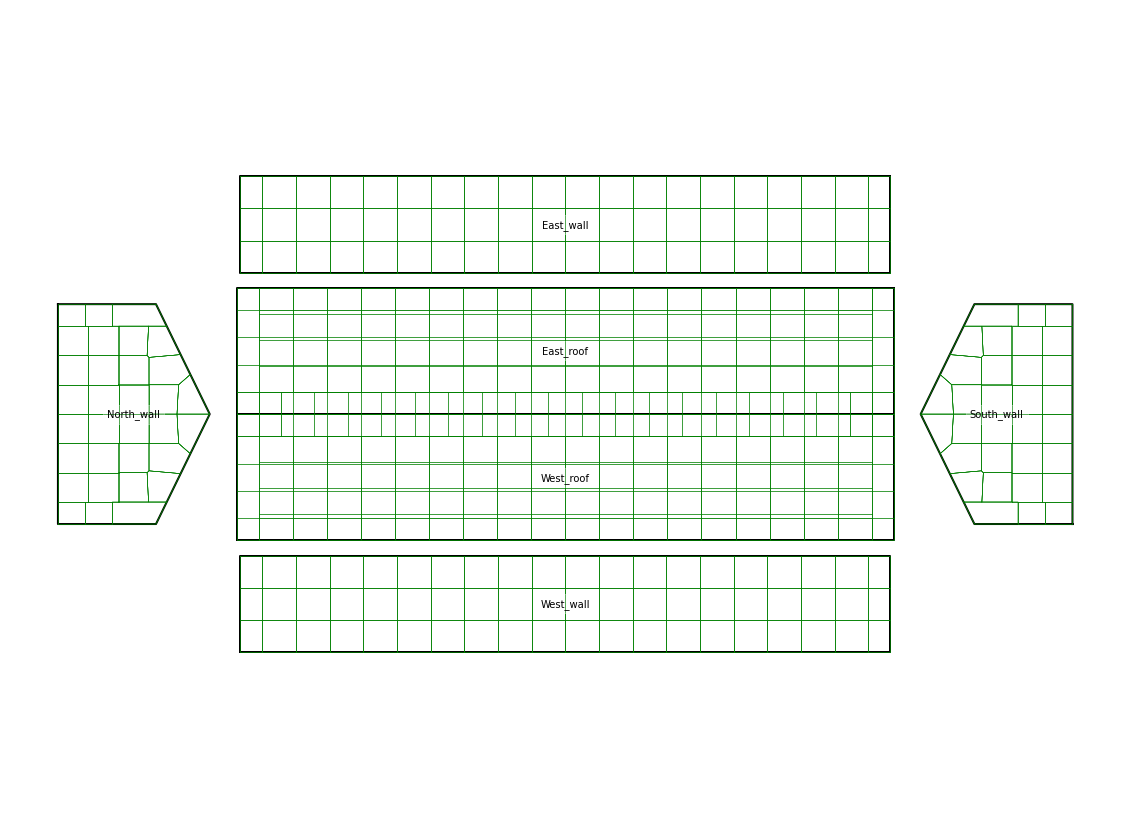

In [14]:
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot()

bldg.plotEdges(ax=ax,showName=True)
# bldg.plotZones(ax=ax)
# bldg.plotTaps(ax=ax,showTapNo=False)
# bldg.plotTribs(ax=ax)
bldg.plotPanels(ax=ax,aIdx=2)

ax.axis('equal')
ax.axis('off')
# if saveFigs:
    # fig.savefig(figDir+"tapLayout.svg",format='svg',dpi=1200, bbox_inches='tight')



## Wind field

### Read data

In [12]:
dt_cobraProbe = 3.7890e-04

temp = pd.read_csv(dir_wtVl_tngE2+"profiles.csv")
U_TH = np.load(dir_wtVl_tngE2+"UofT.npy")
V_TH = np.load(dir_wtVl_tngE2+"VofT.npy")
W_TH = np.load(dir_wtVl_tngE2+"WofT.npy")
wtVel_E2 = wind.profile(name="BLWT(z_0=0.01m)", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt_cobraProbe,nSpectAvg=64)

temp = pd.read_csv(dir_wtVl_tngE3+"profiles.csv")
U_TH = np.load(dir_wtVl_tngE3+"UofT.npy")
V_TH = np.load(dir_wtVl_tngE3+"VofT.npy")
W_TH = np.load(dir_wtVl_tngE3+"WofT.npy")
wtVel_E3 = wind.profile(name="BLWT(z_0=0.087m)", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt_cobraProbe,nSpectAvg=64)

U_TH = V_TH = W_TH = None

NameError: name 'dir_wtVl_tngE2' is not defined

In [ ]:
lesVel_E2 = foam.processVelProfile(caseDir=dir_lesE2_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
lesVel_E2.name = "LES(z_0=0.01m)"

lesVel_E3 = foam.processVelProfile(caseDir=dir_lesE3_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
lesVel_E3.name = "LES(z_0=0.087m)"

In [ ]:
vel = wind.Profiles([wtVel_E2, lesVel_E2, wtVel_E3, lesVel_E3])
esdu74_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu74_E3 = wind.ESDU74(z0=0.087, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu85_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu85_E3 = wind.ESDU74(z0=0.087, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))

### Plot wind field

#### Profiles $U$, $I_u$, $I_v$, and $I_w$

In [ ]:
wtZ = wtVel_E2.Z[:25]
wtIu = wtVel_E2.Iu[:25]
lesIu = np.interp(wtZ, lesVel_E2.Z, lesVel_E2.Iu)
err_E2_Iu = np.mean(np.abs(lesIu - wtIu))

print(err_E2_Iu)

wtZ = wtVel_E3.Z[:25]
wtIu = wtVel_E3.Iu[:25]
lesIu = np.interp(wtZ, lesVel_E3.Z, lesVel_E3.Iu)
err_E3_Iu = np.mean(np.abs(lesIu - wtIu))

print(err_E3_Iu)


In [ ]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

def typicalEdits(ax):
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    ax.set_ylim([0,5])
    
fig = plt.figure(figsize=[15,4])
fig.subplots_adjust(wspace=0.1)

ax = plt.subplot(1,4,1)
ax.plot(wtVel_E2.UbyUh(), wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.UbyUh(), lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.U()/esdu74_E2.Uref, esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.UbyUh(), wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.UbyUh(), lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.U()/esdu74_E3.Uref, esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0,1.7])
ax.set_xlabel(r'$U/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,4,2)
ax.plot(wtVel_E2.Iu, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iu, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iu(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iu, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iu, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iu(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0,0.5])
# ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.set_xlabel(r'$I_u$',fontsize=fntSz)
typicalEdits(ax)
ax.yaxis.set_ticklabels([])


ax = plt.subplot(1,4,3)
ax.plot(wtVel_E2.Iv, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iv, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iv(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iv, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iv, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iv(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0,0.5])
ax.set_xlabel(r'$I_v$',fontsize=fntSz)
typicalEdits(ax)
ax.yaxis.set_ticklabels([])


ax = plt.subplot(1,4,4)
ax.plot(wtVel_E2.Iw, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iw, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iw(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iw, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iw, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iw(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0.01,0.5])
ax.set_xlabel(r'$I_w$',fontsize=fntSz)
typicalEdits(ax)
ax.yaxis.set_ticklabels([])
ax.legend()

plt.show()

if saveFigs:
    fig.savefig(figDir+"profiles.svg",format='svg',dpi=1200, bbox_inches='tight')

#### $U$ and $I_u$ profiles and $S_{uu}$ spectra

In [ ]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

def typicalEdits(ax):
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    
fig = plt.figure(figsize=[15,4])
fig.subplots_adjust(wspace=0.25)

ax = plt.subplot(1,3,1)
ax.plot(wtVel_E2.UbyUh(), wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.UbyUh(), lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.U()/esdu74_E2.Uref, esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=[0.5,0,0], linestyle='--', lw=1.5)

ax.plot(wtVel_E3.UbyUh(), wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.UbyUh(), lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.U()/esdu74_E3.Uref, esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=1.5)
ax.set_ylim([0,5])
ax.set_xlim([0,1.7])
ax.set_xlabel(r'$U/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)


ax = plt.subplot(1,3,2)
ax.plot(wtVel_E2.Iu, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iu, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iu(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=[0.5,0,0], linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iu, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iu, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iu(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=1.5)

ax.text(0.35, 4.5, r'$MAE = Avg.\left|I_u^{LES}-I_u^{WT}\right|$',color='k',fontsize=11,ha='center')
ax.text(0.35, 4.1, r'$MAE$ of E2 = '+"{:.2g}".format(err_E2_Iu),color='r',fontsize=11,ha='center')
ax.text(0.35, 3.7, r'$MAE$ of E3 = '+"{:.2g}".format(err_E3_Iu),color='b',fontsize=11,ha='center')
ax.set_ylim([0,5])
ax.set_xlim([0,0.5])
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.set_xlabel(r'$I_u$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,3)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSuu(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSuu(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSuu()[0], esdu74_E2.rSuu()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSuu(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSuu(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSuu()[0], esdu74_E3.rSuu()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([1e-4,2e0])
ax.set_ylim([1e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{uu}/\sigma_u^2$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)

plt.show()

if saveFigs:
    fig.savefig(figDir+"profAndSpect.svg",format='svg',dpi=1200, bbox_inches='tight')

#### $S_{uu}$, $S_{vv}$, and $S_{ww}$ spectra

In [ ]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

    
fig = plt.figure(figsize=[15,4])

fig.subplots_adjust(wspace=0.25)

ax = plt.subplot(1,3,1)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSuu(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSuu(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSuu()[0], esdu74_E2.rSuu()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSuu(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSuu(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSuu()[0], esdu74_E3.rSuu()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{uu}/\sigma_u^2$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,2)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSvv(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSvv(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSvv()[0], esdu74_E2.rSvv()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSvv(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSvv(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSvv()[0], esdu74_E3.rSvv()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{vv}/\sigma_v^2$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,3)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSww(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSww(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSww()[0], esdu74_E2.rSww()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSww(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSww(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSww()[0], esdu74_E3.rSww()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{ww}/\sigma_w^2$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)

plt.show()

if saveFigs:
    fig.savefig(figDir+"spectra.svg",format='svg',dpi=1200, bbox_inches='tight')

## Surface pressure, $C_p$

### Read data

In [ ]:
peakMethod = 'minmax'
Uh_FS = 25.0

#### Wind tunnel data

In [ ]:
mainRefPitotChnlIdx = 2
fps2mps = 0.3048
Zpitot = 1.48
Ntaps = 456
tMax = 12000  # approximately keeping the same duration
AoAids = ['001', '010', '019']

In [ ]:
N_AoA = len(AoAids)
AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for d,aoa in enumerate(AoAids):
    file_pssd = dir_wtCp_tngE2+'TNGp1E02R001P'+ AoAids[d] +'a.pssd'
    file_pssr = dir_wtCp_tngE2+'TNGp1E02R001P'+ AoAids[d] +'a.pssr'

    cp_data,analog,WTTDATALOG = windIO.readPSSfile(file_pssr,file_pssd)

    if d == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[d,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[d,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[d] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[d] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)

wtCp_tngE2 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='tngE2p1',
                refProfile=wtVel_E2,
                Zref_input=Zpitot,
                Uref_input=Upitot,
                samplingFreq=sampleRate[0],
                AoA=AoA,
                CpOfT=CpTH[:,:,:tMax],
                badTaps=badTaps,
                reReferenceCpToH=True,
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod=peakMethod,
                keepTH=False,
                )
CpTH = analog = cp_data = None

In [ ]:
N_AoA = len(AoAids)
AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for d,aoa in enumerate(AoAids):
    file_pssd = dir_wtCp_tngE3+'TNGp1E03R001P'+ AoAids[d] +'a.pssd'
    file_pssr = dir_wtCp_tngE3+'TNGp1E03R001P'+ AoAids[d] +'a.pssr'

    cp_data,analog,WTTDATALOG = windIO.readPSSfile(file_pssr,file_pssd)

    if d == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[d,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[d,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[d] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[d] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)

wtCp_tngE3 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='tngE3p1',
                refProfile=wtVel_E3,
                Zref_input=Zpitot,
                Uref_input=Upitot,
                samplingFreq=sampleRate[0],
                AoA=AoA,
                CpOfT=CpTH[:,:,:tMax],
                badTaps=badTaps,
                reReferenceCpToH=True,
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod=peakMethod,
                keepTH=False,
                )
CpTH = analog = cp_data = None

In [ ]:
print(bldg[1].NumTaps)
print(np.shape(bldg[1].tapNo_all))
print(np.shape(bldg[1].tapNo))
print(np.shape(bldg[1].tapIdx))
print(np.shape(bldg[1].tapTribs.geoms))
print(np.shape(bldg[1].tapCoord))
print(np.shape(bldg[1].tapCoord3D))
print(np.shape(bldg[1].tapWghtPerPanel))

ftp = bldg[1].tapNo
tp = bldg.tapNo
idx = np.where(np.isin(tp, ftp))[0]
print(np.shape(idx))

In [ ]:
tapNo = bldg.tapNo
TapNoAll = bldg.tapNo_all
tapIdx = bldg.tapIdx
expectedIdx = range(len(bldg.tapNo))

tapNo_0 = bldg[0].tapNo
tapNoAll_0 = bldg[0].tapNo_all
tapIdx_0 = bldg[0].tapIdx

expectedIdx_0 = np.where(np.in1d(tapNo, tapNo_0))[0]

print(np.shape(tapNo))
print(np.shape(TapNoAll))
print(np.shape(tapIdx))

print(np.shape(tapNo_0))
print(np.shape(tapNoAll_0))
print(np.shape(tapIdx_0))


#### LES data

In [ ]:
p0_ProbeName='probes.V0'
p0Idx = 30

trimTimeSegs=[[0,1.0]]
AoA = [0.0,45.0,90.0]

In [ ]:
def getClosestIdx(Tp, Tp0, tol=0.004):
    idx = np.zeros_like(Tp,dtype=int)
    for i,tp in enumerate(Tp):
        idx[i] = np.argmin(np.abs(Tp0-tp))
        if abs(tp-Tp0[idx[i]]) > tol:
            print(f"Time gap b/n p and p0: {abs(tp-Tp0[idx[i]])}")

    return idx


In [ ]:
sIdx = 700
eIdx = 10300
nTime = eIdx-sIdx

# 0 deg
pOfTfile = dir_lesE2_00+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT = np.load(pOfTfile)
m,n = np.shape(pOfT)
pOfT = np.reshape(pOfT,(1,m,n))
T_p = np.load(dir_lesE2_00+'postProcessing/wallPressure_times.npy')

_, T_p0, p0OfT = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE2_00+'postProcessing/', field='p', shiftTimeToZero=False)
p0OfT = np.reshape(np.transpose(p0OfT)[p0Idx,:],(1,1,-1))
idx_p0 = getClosestIdx(T_p, T_p0)
p0OfT = p0OfT[:,:,idx_p0]

pOfT = np.subtract(pOfT,p0OfT)[:,:,sIdx:eIdx]


# 45 deg
pOfTfile = dir_lesE2_45+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)
m,n = np.shape(pOfT_)
pOfT_ = np.reshape(pOfT_,(1,m,n))
T_p = np.load(dir_lesE2_45+'postProcessing/wallPressure_times.npy')

_, T_p0, p0OfT_ = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE2_45+'postProcessing/', field='p', shiftTimeToZero=False)
p0OfT_ = np.reshape(np.transpose(p0OfT_)[p0Idx,:],(1,1,-1))
idx_p0 = getClosestIdx(T_p, T_p0)
p0OfT_ = p0OfT_[:,:,idx_p0]

pOfT_ = np.subtract(pOfT_,p0OfT_)
pOfT = np.concatenate((pOfT, pOfT_[:,:,sIdx:eIdx]), axis=0)


# 90 deg
pOfTfile = dir_lesE2_90+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)
m,n = np.shape(pOfT_)
pOfT_ = np.reshape(pOfT_,(1,m,n))
T_p = np.load(dir_lesE2_90+'postProcessing/wallPressure_times.npy')

_, T_p0, p0OfT_ = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE2_90+'postProcessing/', field='p', shiftTimeToZero=False)
p0OfT_ = np.reshape(np.transpose(p0OfT_)[p0Idx,:],(1,1,-1))
idx_p0 = getClosestIdx(T_p, T_p0)
p0OfT_ = p0OfT_[:,:,idx_p0]

pOfT_ = np.subtract(pOfT_,p0OfT_)
pOfT = np.concatenate((pOfT, pOfT_[:,:,sIdx:eIdx]), axis=0)


lesCp_E2 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='LES-E2',
                refProfile=lesVel_E2,
                Zref_input=H,  # for the Cp TH being input below
                Uref_input=lesVel_E2.Uh,  # for the Cp TH being input below
                samplingFreq=lesVel_E2.samplingFreq,
                AoA=AoA,
                pOfT=pOfT,
                peakMethod=peakMethod,
                badTaps=badTaps,
                # keepTH=False,
                )
pOfT = pOfT_ = None

In [ ]:
sIdx = 200
eIdx = 9930
nTime = eIdx-sIdx

# 0 deg
pOfTfile = dir_lesE3_00+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT = np.load(pOfTfile)
m,n = np.shape(pOfT)
pOfT = np.reshape(pOfT,(1,m,n))
T_p = np.load(dir_lesE3_00+'postProcessing/wallPressure_times.npy')

_, T_p0, p0OfT = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE3_00+'postProcessing/', field='p', shiftTimeToZero=False)
p0OfT = np.reshape(np.transpose(p0OfT)[p0Idx,:],(1,1,-1))
idx_p0 = getClosestIdx(T_p, T_p0)
p0OfT = p0OfT[:,:,idx_p0]

p0OfT = p0OfT[:,:,:-1]
pOfT = np.subtract(pOfT,p0OfT)[:,:,sIdx:eIdx]



# 45 deg
pOfTfile = dir_lesE3_45+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)
m,n = np.shape(pOfT_)
pOfT_ = np.reshape(pOfT_,(1,m,n))
T_p = np.load(dir_lesE3_45+'postProcessing/wallPressure_times.npy')

_, T_p0, p0OfT_ = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE3_45+'postProcessing/', field='p', shiftTimeToZero=False)
p0OfT_ = np.reshape(np.transpose(p0OfT_)[p0Idx,:],(1,1,-1))
idx_p0 = getClosestIdx(T_p, T_p0)
p0OfT_ = p0OfT_[:,:,idx_p0]

pOfT_ = np.subtract(pOfT_,p0OfT_)
pOfT = np.concatenate((pOfT, pOfT_[:,:,sIdx:eIdx]), axis=0)



# 90 deg
pOfTfile = dir_lesE3_90+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)
m,n = np.shape(pOfT_)
pOfT_ = np.reshape(pOfT_,(1,m,n))
T_p = np.load(dir_lesE3_90+'postProcessing/wallPressure_times.npy')

_, T_p0, p0OfT_ = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE3_90+'postProcessing/', field='p', shiftTimeToZero=False)
p0OfT_ = np.reshape(np.transpose(p0OfT_)[p0Idx,:],(1,1,-1))
idx_p0 = getClosestIdx(T_p, T_p0)
p0OfT_ = p0OfT_[:,:,idx_p0]

pOfT_ = np.subtract(pOfT_,p0OfT_)
pOfT = np.concatenate((pOfT, pOfT_[:,:,sIdx:eIdx]), axis=0)

lesCp_E3 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='LES-E3',
                refProfile=lesVel_E3,
                Zref_input=H,  # for the Cp TH being input below
                Uref_input=lesVel_E3.Uh,  # for the Cp TH being input below
                samplingFreq=lesVel_E3.samplingFreq,
                AoA=AoA,
                pOfT=pOfT,
                # p0ofT=p0OfT[:,:,100:nT],
                peakMethod=peakMethod,
                badTaps=badTaps,
                # keepTH=False,
                )
pOfT = pOfT_ = None



### $C_p$ Plots

In [ ]:
# d = 1
# tap = 409
# t = bldg.tapNo.index(tap)

# plt.figure(figsize=[20,5])
# plt.plot(lesCp_E2.CpOfT[d,t,:],label='LES')
# plt.plot(wtCp_tngE3.CpOfT[d,t,:],label='WT')
# # plt.xlim([8000,8600])
# plt.legend()
# plt.show()


#### Local pressure

In [ ]:
# lesCp_E2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(lesCp_E2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])
# wtCp_tngE2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(wtCp_tngE2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])

# lesCp_E2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(lesCp_E2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])
# wtCp_tngE2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(wtCp_tngE2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])

In [ ]:
nrow, ncol = 2, N_AoA

fld = 'mean'
fldRange=[-1.6,0.8]

fig, axs = plt.subplots(nrow, ncol)
fig.set_figheight(5*nrow)
fig.set_figwidth(6*ncol)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

for d,D in enumerate(lesCp_E2.AoA):
    ax = axs[0,d]
    wtCp_tngE2.plotTapCpStatContour(fieldName=fld,dxnIdx=d,ax=ax,fldRange=fldRange)
    wtCp_tngE2.plotEdges(ax=ax,showName=False)
    wtCp_tngE2.plotTaps(ax=ax,dotSz=1)
    ax.axis('off')
    ax.axis('equal')
    ax.set_title(r'$\theta='+str(np.round(D,0))+r'^\circ$',fontsize=16)

    ax = axs[1,d]
    lesCp_E2.plotTapCpStatContour(fieldName=fld,dxnIdx=d,ax=ax,fldRange=fldRange)
    lesCp_E2.plotEdges(ax=ax,showName=False)
    lesCp_E2.plotTaps(ax=ax,dotSz=1)
    ax.axis('off')
    ax.axis('equal')

# if saveFigs:
#     fig.savefig(figDir+"Cp_"+fld+".svg",format='svg',dpi=1200, bbox_inches='tight')

In [ ]:

fig, ax = plt.subplots()
cmap = plt.get_cmap('RdBu')

plt.axis('off')
norm = plt.Normalize(*fldRange)

cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cb.ax.set_title(r"Mean $C_p$")
plt.show()
if saveFigs:
    fig.savefig(figDir+"Cp_"+fld+"_cmap.svg",format='svg',dpi=1200, bbox_inches='tight')


In [ ]:
badTaps = np.array([1316, 1807, 2609,],dtype=int)
badIdx = np.where(np.in1d(bldg.tapNo, badTaps))[0]
mask = np.ones_like(bldg.tapNo, dtype=bool)
mask[badIdx] = False

fld = 'mean'
err_E2_mean = np.array([0,0,0],dtype=float)
for d in range(3):
    LES = lesCp_E2.CpStats[fld][d,mask]
    WT = wtCp_tngE2.CpStats[fld][d,mask]
    err_E2_mean[d] = np.mean(np.abs(LES-WT))/np.ptp(WT)

fld = 'std'
err_E2_std = np.array([0,0,0],dtype=float)
for d in range(3):
    LES = lesCp_E2.CpStats[fld][d,mask]
    WT = wtCp_tngE2.CpStats[fld][d,mask]
    err_E2_std[d] = np.mean(np.abs(LES-WT))/np.ptp(WT)

err_E2_peak = np.array([0,0,0],dtype=float)
for d in range(3):
    LES = np.append(lesCp_E2.CpStats['peakMax'][d,mask], lesCp_E2.CpStats['peakMin'][d,mask])
    WT = np.append(wtCp_tngE2.CpStats['peakMax'][d,mask], wtCp_tngE2.CpStats['peakMin'][d,mask])
    err_E2_peak[d] = np.mean(np.abs(LES-WT))/np.ptp(WT)


fld = 'mean'
err_E3_mean = np.array([0,0,0],dtype=float)
for d in range(3):
    LES = lesCp_E3.CpStats[fld][d,mask]
    WT = wtCp_tngE3.CpStats[fld][d,mask]
    err_E3_mean[d] = np.mean(np.abs(LES-WT))/np.ptp(WT)

fld = 'std'
err_E3_std = np.array([0,0,0],dtype=float)
for d in range(3):
    LES = lesCp_E3.CpStats[fld][d,mask]
    WT = wtCp_tngE3.CpStats[fld][d,mask]
    err_E3_std[d] = np.mean(np.abs(LES-WT))/np.ptp(WT)

err_E3_peak = np.array([0,0,0],dtype=float)
for d in range(3):
    LES = np.append(lesCp_E3.CpStats['peakMax'][d,mask], lesCp_E3.CpStats['peakMin'][d,mask])
    WT = np.append(wtCp_tngE3.CpStats['peakMax'][d,mask], wtCp_tngE3.CpStats['peakMin'][d,mask])
    err_E3_peak[d] = np.mean(np.abs(LES-WT))/np.ptp(WT)

err_E2_mean = np.transpose(err_E2_mean)*100
err_E2_std = np.transpose(err_E2_std)*100
err_E2_peak = np.transpose(err_E2_peak)*100
err_E3_mean = np.transpose(err_E3_mean)*100
err_E3_std = np.transpose(err_E3_std)*100
err_E3_peak = np.transpose(err_E3_peak)*100
print(err_E2_mean)
print(err_E2_std)
print(err_E2_peak)
print(err_E3_mean)
print(err_E3_std)
print(err_E3_peak)


In [ ]:
def forall(ax,lims):
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    ax.plot([-100,100],[-100,100],'-k',lw=0.7)
    # ax.axis('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    # ax.set_xlabel('BLWT')
    # ax.set_ylabel('LES')
    


meanRng = [-4,1.5]
stdRng = [0,1.3]
peakRng = [-10,4.5]

fig = plt.figure(figsize=[13,6])
nrow,ncol = 2,4

ax = fig.add_subplot(nrow,ncol,1)
fld = 'mean'
ax.plot(wtCp_tngE2.CpStats[fld][0,mask], lesCp_E2.CpStats[fld][0,mask], '.r', label=r'$0^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][1,mask], lesCp_E2.CpStats[fld][1,mask], '.g', label=r'$45^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][2,mask], lesCp_E2.CpStats[fld][2,mask], '.b', label=r'$90^\circ$')
forall(ax,meanRng)
ax.legend()
ax.set_ylabel('LES')
ax.set_title(r'Mean $C_p$')

ax = fig.add_subplot(nrow,ncol,2)
fld = 'std'
ax.plot(wtCp_tngE2.CpStats[fld][0,mask], lesCp_E2.CpStats[fld][0,mask], '.r', label=r'$0^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][1,mask], lesCp_E2.CpStats[fld][1,mask], '.g', label=r'$45^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][2,mask], lesCp_E2.CpStats[fld][2,mask], '.b', label=r'$90^\circ$')
forall(ax,stdRng)
ax.set_title(r'Std. $C_p$')

ax = fig.add_subplot(nrow,ncol,3)
fld = 'peakMin'
ax.plot(wtCp_tngE2.CpStats[fld][0,mask], lesCp_E2.CpStats[fld][0,mask], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][1,mask], lesCp_E2.CpStats[fld][1,mask], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][2,mask], lesCp_E2.CpStats[fld][2,mask], '.b', label=r'E2-$90^\circ$')
fld = 'peakMax'
ax.plot(wtCp_tngE2.CpStats[fld][0,mask], lesCp_E2.CpStats[fld][0,mask], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][1,mask], lesCp_E2.CpStats[fld][1,mask], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE2.CpStats[fld][2,mask], lesCp_E2.CpStats[fld][2,mask], '.b', label=r'E2-$90^\circ$')
forall(ax,peakRng)
ax.set_title(r'Peak $C_p$')



ax = fig.add_subplot(nrow,ncol,4)
errNames = np.array([1.0, 2.0, 3.0],dtype=float)
ax.bar(errNames-0.2, err_E2_mean, width=0.2, color='r', label=r'$0^\circ$') #, hatch="/", hatch_scale=0.5)
ax.bar(errNames, err_E2_std, width=0.2, color='g', label=r'$45^\circ$') #, hatch="\\", hatch_scale=0.5)
ax.bar(errNames+0.2, err_E2_peak, width=0.2, color='b', label=r'$90^\circ$') #, hatch="+", hatch_scale=0.5)
ax.tick_params(axis='y',direction='in',which='both',right=True)
ax.legend()
ax.set_ylim([0, 13.0])
ax.set_title('NMAE [%]')
ax.set_xticklabels([' ', r'Mean $C_p$', r'Std. $C_p$', r'Peak $C_p$'])




ax = fig.add_subplot(nrow,ncol,5)
fld = 'mean'
ax.plot(wtCp_tngE3.CpStats[fld][0,mask], lesCp_E3.CpStats[fld][0,mask], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][1,mask], lesCp_E3.CpStats[fld][1,mask], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][2,mask], lesCp_E3.CpStats[fld][2,mask], '.b', label=r'E2-$90^\circ$')
forall(ax,meanRng)
ax.set_xlabel('BLWT')
ax.set_ylabel('LES')

ax = fig.add_subplot(nrow,ncol,6)
fld = 'std'
ax.plot(wtCp_tngE3.CpStats[fld][0,mask], lesCp_E3.CpStats[fld][0,mask], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][1,mask], lesCp_E3.CpStats[fld][1,mask], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][2,mask], lesCp_E3.CpStats[fld][2,mask], '.b', label=r'E2-$90^\circ$')
forall(ax,stdRng)
ax.set_xlabel('BLWT')

ax = fig.add_subplot(nrow,ncol,7)
fld = 'peakMin'
ax.plot(wtCp_tngE3.CpStats[fld][0,mask], lesCp_E3.CpStats[fld][0,mask], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][1,mask], lesCp_E3.CpStats[fld][1,mask], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][2,mask], lesCp_E3.CpStats[fld][2,mask], '.b', label=r'E2-$90^\circ$')
fld = 'peakMax'
ax.plot(wtCp_tngE3.CpStats[fld][0,mask], lesCp_E3.CpStats[fld][0,mask], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][1,mask], lesCp_E3.CpStats[fld][1,mask], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE3.CpStats[fld][2,mask], lesCp_E3.CpStats[fld][2,mask], '.b', label=r'E2-$90^\circ$')
forall(ax,peakRng)
ax.set_xlabel('BLWT')


ax = fig.add_subplot(nrow,ncol,8)
errNames = np.array([1.0, 2.0, 3.0],dtype=float)
ax.bar(errNames-0.2, err_E3_mean, width=0.2, color='r', label=r'$0^\circ$') #, hatch="/", hatch_scale=0.5)
ax.bar(errNames, err_E3_std, width=0.2, color='g', label=r'$45^\circ$') #, hatch="\\", hatch_scale=0.5)
ax.bar(errNames+0.2, err_E3_peak, width=0.2, color='b', label=r'$90^\circ$') #, hatch="+", hatch_scale=0.5)
ax.text(2.0, 11.0, r'$NMAE = \frac{\left| C_p^{LES} - C_p^{WT} \right|}{C_{p,max}^{WT} - C_{p,min}^{WT}}\times 100\%$',
        ha='center',fontsize=11)
ax.tick_params(axis='y',direction='in',which='both',right=True)
ax.set_ylim([0, 13.0])
ax.set_xticklabels([' ', r'Mean $C_p$', r'Std. $C_p$', r'Peak $C_p$'])


if saveFigs:
    fig.savefig(figDir+"Cp_WTvsLES.svg",format='svg',dpi=1200, bbox_inches='tight')

In [ ]:


fig = plt.figure(figsize=[15,7])
nrow,ncol = 1,1

ax = fig.add_subplot(nrow,ncol,1)
fld = 'mean'
# ax.plot(wtCp_tngE2.tapNo, wtCp_tngE2.CpStats[fld][0,:] - lesCp_E2.CpStats[fld][0,:], '.r', label=r'E2-$0^\circ$')
# ax.plot(wtCp_tngE2.tapNo, wtCp_tngE2.CpStats[fld][1,:] - lesCp_E2.CpStats[fld][1,:], '.g', label=r'E2-$45^\circ$')
# ax.plot(wtCp_tngE2.tapNo, wtCp_tngE2.CpStats[fld][2,:] - lesCp_E2.CpStats[fld][2,:], '.b', label=r'E2-$90^\circ$')

ax.plot(wtCp_tngE3.tapNo, wtCp_tngE3.CpStats[fld][0,:] - lesCp_E3.CpStats[fld][0,:], '.r', label=r'E2-$0^\circ$')
ax.plot(wtCp_tngE3.tapNo, wtCp_tngE3.CpStats[fld][1,:] - lesCp_E3.CpStats[fld][1,:], '.g', label=r'E2-$45^\circ$')
ax.plot(wtCp_tngE3.tapNo, wtCp_tngE3.CpStats[fld][2,:] - lesCp_E3.CpStats[fld][2,:], '.b', label=r'E2-$90^\circ$')

# ax.set_xlim([2599, 2617])
# forall(ax,meanRng)
# ax.set_ylabel('LES')


#### Area averaged load

In [ ]:
# ncol, nrow = N_AoA*2, len(bldg[0].nominalPanelAreas)

# fld = 'peakMin'
# fldRange=[-8,2]

# fig, axs = plt.subplots(nrow, ncol)
# fig.set_figheight(6*nrow)
# fig.set_figwidth(6*ncol)
# fig.subplots_adjust(wspace=0.0, hspace=0.0)

# for a,A in enumerate(bldg[0].nominalPanelAreas):
#     for d,D in enumerate(lesCp_E2.AoA):

#         ax = axs[a,d*2]
#         wtCp_tngE2.plotPanelCpStatContour(fieldName=fld,dxnIdx=d,aIdx=a,ax=ax,fldRange=fldRange)
#         wtCp_tngE2.plotEdges(ax=ax,showName=False)
#         wtCp_tngE2.plotZones(ax=ax)
#         ax.axis('off')
#         ax.axis('equal')
#         if a == 0:
#             ax.set_title(r'BLWT, $\theta='+str(np.round(D,0))+r'^\circ$',fontsize=16)

#         ax = axs[a,d*2+1]
#         lesCp_E2.plotPanelCpStatContour(fieldName=fld,dxnIdx=d,aIdx=a,ax=ax,fldRange=fldRange)
#         lesCp_E2.plotEdges(ax=ax,showName=False)
#         wtCp_tngE2.plotZones(ax=ax)
#         ax.axis('off')
#         ax.axis('equal')
#         if a == 0:
#             ax.set_title(r'LES, $\theta='+str(np.round(D,0))+r'^\circ$',fontsize=16)
# if saveFigs:
#     fig.savefig(figDir+"areaAvgCp_"+fld+".svg",format='svg',dpi=1200, bbox_inches='tight')

In [ ]:
NBCC_A_min = [
            [0.1, 1, 10, 100], # c
            [0.1, 2.2, 10, 100], # s
            [0.1, 1, 10, 100], # r
            ]
NBCC_CpCg_min = np.array([
            [-5, -5, -4, -4],
            [-3.6, -3.6, -2.6, -2.6],
            [-2.45, -2.45, -2, -2]
            ],dtype=float)
NBCC_A_max = [0.1, 1, 10, 100]
NBCC_CpCg_max = np.array([0.75, 0.75, 0.5, 0.5],dtype=float)

ft2m_sq = 0.3048**2

ASCE_A_min = np.array([
            [0.1, 10, 500, 2000], # 3
            [0.1, 10, 500, 2000], # 2
            [0.1, 10, 500, 2000], # 1
            [0.1, 100, 500, 2000], # 1'
            ],dtype=float)*ft2m_sq
ASCE_GCp_min = np.array([
            [-3.2, -3.2, -1.4, -1.4], # 3
            [-2.3, -2.3, -1.4, -1.4], # 2
            [-1.7, -1.7, -1.0, -1.0], # 1
            [-0.9, -0.9, -0.4, -0.4], # 1'
            ],dtype=float)
ASCE_A_max = np.array([0.1, 100, 500, 2000],dtype=float)*ft2m_sq
ASCE_GCp_max = np.array([0.3, 0.3, 0.2, 0.2],dtype=float)


In [ ]:
from typing import List,Literal,Dict,Tuple,Any

def CpStatsAreaAvgCollected(self, mixNominalAreas=False, 
                    envelope:Literal['max','min','none']='none', 
                    extremesPerNominalArea:Literal['max','min','none']='none'):
    # [Nfaces][Nzones][Narea][Nflds][N_AoA,Npanels]
    zNames = []
    for z, zn in enumerate(self.zoneDict):
        zNames.append(self.zoneDict[zn][0]+'_'+self.zoneDict[zn][1])
    CpAavg = self.zoneDict
    for zm, zone_m in enumerate(CpAavg):
        if mixNominalAreas:
            CpAavg[zone_m][2] = {}
            for _, fld in enumerate(self.CpStatsAreaAvg[0][zm][0]):
                CpAavg[zone_m][2][fld] = None                
        else:
            CpAavg[zone_m][2] = []
            for a, _ in enumerate(self.faces[0].nominalPanelAreas):
                CpAavg[zone_m][2].append({})
                for _, fld in enumerate(self.CpStatsAreaAvg[0][zm][0]):
                    CpAavg[zone_m][2][a][fld] = None

    def envelopeFld(fld): # assumes all fields have the AoA as the first index
        if envelope == 'max':
            return np.max(fld,axis=0,keepdims=True) 
        elif envelope == 'min':
            return np.min(fld,axis=0,keepdims=True)
        elif envelope == 'none':
            return fld

    def extremePerArea(fld):
        if extremesPerNominalArea == 'max':
            return np.max(fld,axis=1,keepdims=True) 
        elif extremesPerNominalArea == 'min':
            return np.min(fld,axis=1,keepdims=True)
        elif extremesPerNominalArea == 'none':
            return fld

    for f,fc in enumerate(self.faces):
        for z,zone in enumerate(fc.zoneDict):
            zIdx = zNames.index(fc.zoneDict[zone][0]+'_'+fc.zoneDict[zone][1])
            for a,_ in enumerate(fc.nominalPanelAreas):
                for _, fld in enumerate(self.CpStatsAreaAvg[f][z][a]):
                    if mixNominalAreas:
                        if CpAavg[zIdx][2][fld] is None:
                            CpAavg[zIdx][2][fld] = {}
                            CpAavg[zIdx][2][fld] = envelopeFld(self.CpStatsAreaAvg[f][z][a][fld])
                        else:
                            CpAavg[zIdx][2][fld] = np.concatenate((CpAavg[zIdx][2][fld], envelopeFld(self.CpStatsAreaAvg[f][z][a][fld])), axis=1)
                    else:
                        if CpAavg[zIdx][2][a][fld] is None:
                            CpAavg[zIdx][2][a][fld] = {}
                            CpAavg[zIdx][2][a][fld] = envelopeFld(self.CpStatsAreaAvg[f][z][a][fld])
                        else:
                            CpAavg[zIdx][2][a][fld] = np.concatenate((CpAavg[zIdx][2][a][fld], envelopeFld(self.CpStatsAreaAvg[f][z][a][fld]) ), axis=1)
    if not extremesPerNominalArea == 'none' and not mixNominalAreas:
        __CpAavg = CpAavg
        CpAavg = self.zoneDict
        for zm, zone_m in enumerate(CpAavg):
            CpAavg[zone_m][2] = {}
            for _, fld in enumerate(self.CpStatsAreaAvg[0][zm][0]):
                CpAavg[zone_m][2][fld] = np.zeros_like(self.faces[0].nominalPanelAreas)
                for a, _ in enumerate(self.faces[0].nominalPanelAreas):
                    CpAavg[zone_m][2][fld][a] = np.squeeze(extremePerArea(__CpAavg[zone_m][2][a][fld]))
    return CpAavg

In [ ]:
A = np.array(bldg[0].nominalPanelAreas)
A = np.multiply(A, np.power(1/bldg.lScl,2))
durstFactor = 1.53**2
ASCE_directionalityFactor = 0.85
fact_NBCC_2_ASCE = (1/ASCE_directionalityFactor)*(1/durstFactor)

nrow, ncol = 1, 3
fig, axs = plt.subplots(nrow, ncol)
fig.set_figheight(4*nrow)
fig.set_figwidth(5*ncol)

titles = ['Corner', 'Edge', 'Field']
for z in range(ncol):
    ax = axs[z]
    cpAvg = CpStatsAreaAvgCollected(lesCp_E2, envelope='low',extremesPerNominalArea='low')
    ax.semilogx(A, cpAvg[z][2]['peakMin']*fact_NBCC_2_ASCE,'or',label='LES')
    cpAvg = CpStatsAreaAvgCollected(wtCp_tngE2,envelope='low',extremesPerNominalArea='low')
    ax.semilogx(A, cpAvg[z][2]['peakMin']*fact_NBCC_2_ASCE,'db',label='BLWT')
    ax.semilogx(NBCC_A_min[z], NBCC_CpCg_min[z]*fact_NBCC_2_ASCE,'-k',lw=2,label='NBCC-2020')
    ax.semilogx(ASCE_A_min[z], ASCE_GCp_min[z],'--k',lw=2,label='ASCE 7-22')
    if z == 2:
        ax.semilogx(ASCE_A_min[z+1], ASCE_GCp_min[z+1],'--k',lw=2)

    cpAvg = lesCp_E2.CpStatsAreaAvgCollected(envelope='high',extremesPerNominalArea='high')
    ax.semilogx(A, cpAvg[z][2]['peakMax']*fact_NBCC_2_ASCE,'or')
    cpAvg = wtCp_tngE2.CpStatsAreaAvgCollected(envelope='high',extremesPerNominalArea='high')
    ax.semilogx(A, cpAvg[z][2]['peakMax']*fact_NBCC_2_ASCE,'db')
    ax.semilogx(NBCC_A_max, NBCC_CpCg_max*fact_NBCC_2_ASCE,'-k',lw=2)
    ax.semilogx(ASCE_A_max, ASCE_GCp_max,'--k',lw=2,)


    ax.set_ylim([-6,1])
    ax.set_xlim([0.1,100])
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    ax.invert_yaxis()
    ax.grid('both')
    ax.set_ylabel(r'$GC_p$')
    ax.set_xlabel(r'A [$m^2$]')
    ax.set_title(titles[z])
    if z == 2:
        ax.legend()

if saveFigs:
    fig.savefig(figDir+"areaAvgGCp_LESvsWTvsCode.svg",format='svg',dpi=1200, bbox_inches='tight')

In [ ]:
print(lesCp_E2.CpStatsAreaAvgCollected(envelope='low',extremesPerNominalArea='low'))